In [102]:
library(magrittr)
library(tibble)
library(gutenbergr)
library(dplyr)
library(tidytext)
library(ggplot2)
library(tidyverse)

── Attaching packages ─────────────────────────────────────── tidyverse 1.3.2 ──
✔ tidyr   1.2.1     ✔ stringr 1.4.1
✔ readr   2.1.3     ✔ forcats 0.5.2
✔ purrr   0.3.5     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ NLP::annotate()    masks ggplot2::annotate()
✖ tidyr::extract()   masks magrittr::extract()
✖ dplyr::filter()    masks stats::filter()
✖ dplyr::lag()       masks stats::lag()
✖ purrr::set_names() masks magrittr::set_names()


In [ ]:
#downloading dataset
library(tm)
data("acq")

In [3]:
#check correctness
acq[[1]]$content

[1] "Computer Terminal Systems Inc said\nit has completed the sale of 200,000 shares of its common\nstock, and warrants to acquire an additional one mln shares, to\n<Sedio N.V.> of Lugano, Switzerland for 50,000 dlrs.\n    The company said the warrants are exercisable for five\nyears at a purchase price of .125 dlrs per share.\n    Computer Terminal said Sedio also has the right to buy\nadditional shares and increase its total holdings up to 40 pct\nof the Computer Terminal's outstanding common stock under\ncertain circumstances involving change of control at the\ncompany.\n    The company said if the conditions occur the warrants would\nbe exercisable at a price equal to 75 pct of its common stock's\nmarket price at the time, not to exceed 1.50 dlrs per share.\n    Computer Terminal also said it sold the technolgy rights to\nits Dot Matrix impact technology, including any future\nimprovements, to <Woodco Inc> of Houston, Tex. for 200,000\ndlrs. But, it said it would continue to be the exclusive\nworldwide licensee of the technology for Woodco.\n    The company said the moves were part of its reorganization\nplan and would help pay current operation costs and ensure\nproduct delivery.\n    Computer Terminal makes computer generated labels, forms,\ntags and ticket printers and terminals.\n Reuter"

In [4]:
#dataset into TDM
tdmTfIdf <- TermDocumentMatrix(acq, control = list(
  removePunctuation = TRUE, stopwords = TRUE, stemming = TRUE, removeNumbers = TRUE,
    weighting = weightTfIdf)) #with TFD-IDF
tdmTfIdf

<<TermDocumentMatrix (terms: 1193, documents: 50)>>
Non-/sparse entries: 2718/56932
Sparsity           : 95%
Maximal term length: 16
Weighting          : term frequency - inverse document frequency (normalized) (tf-idf)

In [6]:
tdmSum <- TermDocumentMatrix(acq, control = list(
  removePunctuation = TRUE, stopwords = TRUE, stemming = TRUE, removeNumbers = TRUE))
   # weighting = weightTfIdf)) #just term frequency
tdmSum

<<TermDocumentMatrix (terms: 1193, documents: 50)>>
Non-/sparse entries: 2818/56832
Sparsity           : 95%
Maximal term length: 16
Weighting          : term frequency (tf)

In [328]:
#dot product
dotProduct <- function(tdm) {
    t <- as.matrix(tdm)
    nCol <- ncol(t)
    m <- matrix(0, nrow=0, ncol=nCol)
    # compute dot product of vectors and add to matrix
    for(i in 1:nCol){
        newRow <- t[,i] %*% t %>% round(3)
        m <- rbind(m, newRow)
    }    
    return(m)

}

#cosine similarity
cosineSimilarity <- function(tdm) {
    library(lsa)
    t <- as.matrix(tdm)
    cosine(t) %>% round(2)
}
# not working - will use cosine from lsa package
#     nCol <- ncol(t)
#     f2 <- function(x) sqrt(sum(x^2))
#     m <- matrix(0, nrow=0, ncol=nCol)
#     # compute dot product of vectors and add to matrix
#     for(i in 1:nCol){
#         newRow <- (t[,i] %*% t / (f2(t[,i]^2) * apply(t, 2, f2))) %>% round(3)
#         m <- rbind(m, newRow)
#     }    
#     return(m)
# }
similarityHist <- function(matrix, xAxis, title) {
    m <- matrix[lower.tri(matrix , diag = FALSE)] %>%
    as.data.frame() %>%
    setNames("x")
    m %>%
    ggplot() +
    aes(x) +
    geom_histogram(bins=40, colour="black", fill="white") +
    xlab(xAxis) +
    ylab("counts") +
    ggtitle(title)
}
#getting coordinates of maximal values
getMaximum <- function(matrix) {
    matrix[upper.tri(matrix , diag = TRUE)] <- 0 #get only lower triange, but keep the matrix structure
    m <- matrix
    which(m == max(m), arr.ind=TRUE, useNames = FALSE)
}


In [232]:
plotDotSum <- similarityHist(dotProduct(tdmSum), "dot product", "cross product (tf)")
plotDotIdf <- similarityHist(dotProduct(tdmTfIdf), "dot product", "cross product (tf-idf)")
plotCosSum <- similarityHist(cosineSimilarity(tdmSum), "cosine similarity", "cosine similarity (tf)")
plotCosIdf <- similarityHist(cosineSimilarity(tdmTfIdf), "cosine similarity", "cosine similarity (tf-idf)")

Saving 7 x 7 in image



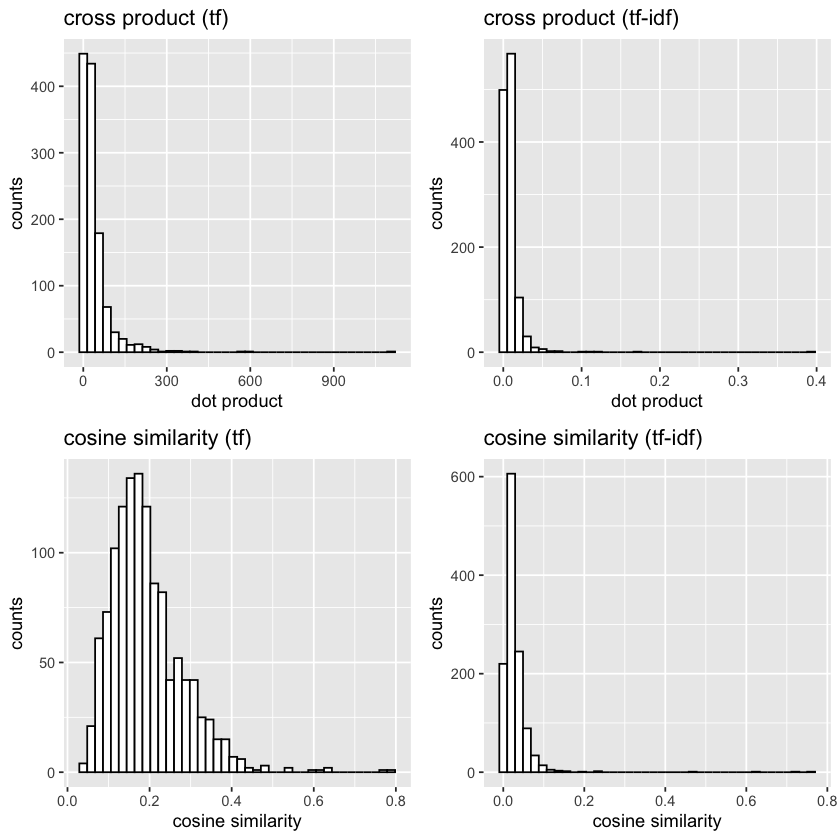

In [233]:
library(gridExtra)
grid.arrange(plotDotSum, plotDotIdf, plotCosSum, plotCosIdf, nrow = 2)
g <- arrangeGrob(plotDotSum, plotDotIdf, plotCosSum, plotCosIdf, nrow=2) #generates g
ggsave(file="similarity.png", g)

In [331]:
#for cosine similarity tf-idf
getMaximum(cosineSimilarity(tdmTfIdf))

46,31


In [333]:
#for cosine similarity tf
getMaximum(cosineSimilarity(tdmSum))

25,7


In [334]:
#for dot product tf
getMaximum(dotProduct(tdmSum))

25,7


#for dot product tf-idf
getMaximum(dotProduct(tdmTfIdf))

**Niezaleznie od metody, maksymalne wartosci obserwujemy dla tych samych artykulow w zaleznosci od metody sumowania lub transoformacji TF-IDF**